In [113]:
#Importing Libraries
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 

import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#default theme
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

#warning hadle
warnings.filterwarnings("ignore")

sns.set(style="darkgrid") # set the background for the graphs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#handling missing value
from sklearn.impute import SimpleImputer

#importing warning library ignoring unwanted error message
import warnings
warnings.filterwarnings("ignore")

#import Scipy libarary for statistical analysis
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import statsmodels.api as sm

#import Algorithm libaries for feature importance, data processing, modeling & evaluation
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Algorithms for handling Imbalance Data
from imblearn.over_sampling import SMOTE, ADASYN
#importing plotly library for some great visualizations
import plotly.graph_objs as go
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.express as px

## Reading Data

In [114]:
df= pd.read_csv('Cleaned_Data_Merchant_Level.csv')
df

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
0             1   20140   2014.0      362           362             Fashion   
1             1   11200   1120.0      371           368             Fashion   
2             2    8500    850.0      368           368             Fashion   
3             1    1980    198.0      558            34             Fashion   
4             1    2400    240.0      413           413             Fashion   
...         ...     ...      ...      ...           ...                 ...   
43667         1    3050    305.0       27            27                 F&B   
43668         1    3120    312.0       31            31                 F&B   
43669         1    1200    120.0       25            25                 F&B   
43670         1      20      2.0        2             2               Other   
43671         2      20      2.0        2             2               Other   

       User_Id  Mer_Id  
0        21053       0  
1        26472       0  
2        26472       0  
3        27075       0  
4        27417       0  
...        ...     ...  
43667    26865      55  
43668    27128      55  
43669    28814      55  
43670    29107      56  
43671    29107      56  

[43672 rows x 8 columns]

In [115]:
df.shape

(43672, 8)

In [116]:
df.tail()

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
43667         1    3050    305.0       27            27                 F&B   
43668         1    3120    312.0       31            31                 F&B   
43669         1    1200    120.0       25            25                 F&B   
43670         1      20      2.0        2             2               Other   
43671         2      20      2.0        2             2               Other   

       User_Id  Mer_Id  
43667    26865      55  
43668    27128      55  
43669    28814      55  
43670    29107      56  
43671    29107      56

## Data Exploration

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trx_Rank             43672 non-null  int64  
 1   Points               43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Customer_Age         43672 non-null  int64  
 5   Category In English  43672 non-null  object 
 6   User_Id              43672 non-null  int64  
 7   Mer_Id               43672 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.7+ MB


In [118]:
df.describe()

Trx_Rank         Points       Trx_Vlu       Trx_Age  Customer_Age  \
count  43672.000000   43672.000000  43672.000000  43672.000000  43672.000000   
mean       1.265227    3312.249748    331.224975    185.186664    144.027844   
std        0.776549    5756.374137    575.637414    121.989540    114.764448   
min        1.000000      20.000000      2.000000      1.000000      1.000000   
25%        1.000000    1220.000000    122.000000     62.000000     34.000000   
50%        1.000000    1893.500000    189.350000    203.000000    115.000000   
75%        1.000000    3100.000000    310.000000    271.000000    252.000000   
max       17.000000  263800.000000  26380.000000    698.000000    682.000000   

            User_Id        Mer_Id  
count  43672.000000  43672.000000  
mean   17173.411889     16.277111  
std     9665.399084     16.099288  
min        0.000000      0.000000  
25%     8710.750000      8.000000  
50%    17561.000000      8.000000  
75%    25634.250000     26.000000  
max    33518.000000     56.000000

In [119]:
df.duplicated().sum()

0

In [120]:
df.isna().sum()

Trx_Rank               0
Points                 0
Trx_Vlu                0
Trx_Age                0
Customer_Age           0
Category In English    0
User_Id                0
Mer_Id                 0
dtype: int64

In [121]:
df['Category In English'].unique()

array(['Fashion', 'F&B', 'Other', 'Grocery', 'Transportaion',
       'Electronics', 'Health & Beauty'], dtype=object)

In [109]:
len(df['Category In English'].unique())

7

In [122]:
df.head()

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
0         1   20140   2014.0      362           362             Fashion   
1         1   11200   1120.0      371           368             Fashion   
2         2    8500    850.0      368           368             Fashion   
3         1    1980    198.0      558            34             Fashion   
4         1    2400    240.0      413           413             Fashion   

   User_Id  Mer_Id  
0    21053       0  
1    26472       0  
2    26472       0  
3    27075       0  
4    27417       0

In [123]:
df['Trx_Rank'].value_counts()

1     36348
2      5079
3      1301
4       497
5       200
6       101
7        57
8        33
9        21
10       13
11       10
12        6
13        2
14        1
15        1
16        1
17        1
Name: Trx_Rank, dtype: int64

In [124]:
px.histogram(data_frame=df , x = "Trx_Rank")

In [125]:
df["Points"].value_counts()

2000     543
1000     388
1400     361
1600     355
1500     353
        ... 
7792       1
10060      1
8999       1
7332       1
1954       1
Name: Points, Length: 5911, dtype: int64

In [126]:
df["Trx_Vlu"].value_counts()

200.0     543
100.0     388
140.0     361
160.0     355
150.0     353
         ... 
779.2       1
1006.0      1
899.9       1
733.2       1
195.4       1
Name: Trx_Vlu, Length: 5911, dtype: int64

In [127]:
px.histogram(data_frame=df , x = "Trx_Vlu")

In [128]:
df["Trx_Age"].value_counts()

20     1318
27     1140
34     1111
41      742
250     553
       ... 
647       1
655       1
641       1
593       1
521       1
Name: Trx_Age, Length: 573, dtype: int64

In [129]:
 df["Customer_Age"].value_counts()

20     2093
27     1761
34     1727
41     1204
13      693
       ... 
557       1
569       1
502       1
473       1
464       1
Name: Customer_Age, Length: 527, dtype: int64

In [130]:
df["Category In English"].describe()

count       43672
unique          7
top       Grocery
freq        30694
Name: Category In English, dtype: object

In [131]:
px.histogram(data_frame=df , x ="Category In English")

In [132]:
df["User_Id"].value_counts()

19390    29
13519    19
1238     19
4360     18
6573     17
         ..
7664      1
7661      1
7659      1
7657      1
16532     1
Name: User_Id, Length: 33457, dtype: int64

In [133]:
df["Mer_Id"].value_counts()

8     19361
3      6896
54     4269
7      3387
29     2963
26     1470
33     1302
40     1012
13      907
22      553
47      311
9       157
4       146
35      134
46      133
43      104
37       88
52       47
28       43
55       41
44       38
11       36
12       35
31       31
25       25
51       20
17       19
2        16
18       14
19       12
21       12
1        11
38       10
16        8
23        6
6         6
0         5
53        4
49        4
36        3
39        3
5         3
15        3
24        3
42        3
45        2
27        2
48        2
32        2
50        2
20        2
56        2
30        1
41        1
14        1
34        1
Name: Mer_Id, dtype: int64

In [134]:
px.box(data_frame=df , x ="Category In English")

In [135]:
df[df["Category In English"] == df["Category In English"].max()]

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
6928         1    2200    220.0      107           107       Transportaion   
6929         1    3500    350.0       14            14       Transportaion   
6930         1    1280    128.0      258           258       Transportaion   
6931         1    1300    130.0      222           222       Transportaion   
6932         1     860     86.0      266           266       Transportaion   
...        ...     ...      ...      ...           ...                 ...   
7069         1    1640    164.0      198           198       Transportaion   
7070         1     720     72.0       62            62       Transportaion   
7071         1    2350    235.0        6             6       Transportaion   
7072         1    1300    130.0      300           300       Transportaion   
7073         1    2260    226.0      384           384       Transportaion   

      User_Id  Mer_Id  
6928      439       4  
6929      477       4  
6930      525       4  
6931     1846       4  
6932     2252       4  
...       ...     ...  
7069    31707       4  
7070    31724       4  
7071    31972       4  
7072    32018       4  
7073    32386       4  

[146 rows x 8 columns]

In [136]:
df[df["Trx_Rank"] == df["Trx_Rank"].max()]

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
33126        17   73380   7338.0       79            74         Electronics   

       User_Id  Mer_Id  
33126    19390      28

In [137]:
df[df["Points"] == df["Points"].max()]

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
21907         8  263800  26380.0       81            74             Grocery   

       User_Id  Mer_Id  
21907    19390       8

In [138]:
df[df["Trx_Vlu"] == df["Trx_Vlu"].max()]

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
21907         8  263800  26380.0       81            74             Grocery   

       User_Id  Mer_Id  
21907    19390       8

In [139]:
df[df["Customer_Age"] == df["Customer_Age"].max()]

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
7967         1     158     15.8      682           682                 F&B   

      User_Id  Mer_Id  
7967     9693       7

In [140]:
df["Category In English"].value_counts(normalize=True)

Grocery            0.702830
F&B                0.176772
Fashion            0.076319
Health & Beauty    0.034439
Electronics        0.005221
Transportaion      0.003343
Other              0.001076
Name: Category In English, dtype: float64

In [141]:
df['Points'].mean()

3312.249748122367

In [142]:
df['Points'].mode()[0]

2000

In [143]:
df['Trx_Vlu'].mean()

331.22497481223667

In [144]:
df['Trx_Vlu'].mode()[0]

200.0

In [145]:
df['Trx_Rank'].mean()

1.2652271478292727

In [146]:
df['Trx_Rank'].mode()[0]

1

In [147]:
df['Customer_Age'].mean()

144.02784392745923

In [148]:
df['Customer_Age'].mode()[0]

20

## Feature Engineering

In [149]:
df.columns

Index(['Trx_Rank', 'Points', 'Trx_Vlu', 'Trx_Age', 'Customer_Age',
       'Category In English', 'User_Id', 'Mer_Id'],
      dtype='object')

In [150]:
df["Totalrank"] = df["Trx_Rank"] + df["Trx_Vlu"]

In [151]:
df["trx_amount"] = round((df["Trx_Vlu"] * 1000) / df['Trx_Age'], 2 )

In [152]:
df

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
0             1   20140   2014.0      362           362             Fashion   
1             1   11200   1120.0      371           368             Fashion   
2             2    8500    850.0      368           368             Fashion   
3             1    1980    198.0      558            34             Fashion   
4             1    2400    240.0      413           413             Fashion   
...         ...     ...      ...      ...           ...                 ...   
43667         1    3050    305.0       27            27                 F&B   
43668         1    3120    312.0       31            31                 F&B   
43669         1    1200    120.0       25            25                 F&B   
43670         1      20      2.0        2             2               Other   
43671         2      20      2.0        2             2               Other   

       User_Id  Mer_Id  Totalrank  trx_amount  
0        21053       0     2015.0     5563.54  
1        26472       0     1121.0     3018.87  
2        26472       0      852.0     2309.78  
3        27075       0      199.0      354.84  
4        27417       0      241.0      581.11  
...        ...     ...        ...         ...  
43667    26865      55      306.0    11296.30  
43668    27128      55      313.0    10064.52  
43669    28814      55      121.0     4800.00  
43670    29107      56        3.0     1000.00  
43671    29107      56        4.0     1000.00  

[43672 rows x 10 columns]

In [153]:
df["trx_After"] = df["Trx_Rank"] - df["trx_amount"]

## Bivariate Analysis

In [154]:
pd.pivot_table(data=df , index = 'Trx_Rank' , columns = 'Trx_Age' , values = 'Totalrank' , aggfunc=len)

Trx_Age    1     2     3     4     5      6     7     8     9     10   ...  \
Trx_Rank                                                               ...   
1         74.0  73.0  55.0  84.0  82.0  264.0  68.0  62.0  73.0  73.0  ...   
2         12.0  10.0  17.0  15.0  17.0   60.0  11.0  14.0  10.0  15.0  ...   
3          6.0   5.0   2.0   3.0   2.0   21.0   1.0   2.0   7.0   3.0  ...   
4          2.0   NaN   2.0   NaN   NaN    8.0   1.0   NaN   3.0   NaN  ...   
5          1.0   NaN   NaN   1.0   NaN    5.0   NaN   2.0   1.0   NaN  ...   
6          NaN   NaN   NaN   NaN   NaN    1.0   NaN   1.0   1.0   1.0  ...   
7          NaN   NaN   NaN   NaN   1.0    NaN   NaN   NaN   NaN   NaN  ...   
8          NaN   NaN   1.0   NaN   NaN    1.0   NaN   NaN   NaN   NaN  ...   
9          1.0   NaN   NaN   NaN   NaN    2.0   NaN   NaN   NaN   NaN  ...   
10         NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  ...   
11         NaN   NaN   1.0   NaN   1.0    NaN   NaN   NaN   NaN   NaN  ...   
12         NaN   1.0   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  ...   
13         NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  ...   
14         NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  ...   
15         NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  ...   
16         NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  ...   
17         NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  ...   

Trx_Age   593  615  625  641  642  644  647  655  682  698  
Trx_Rank                                                    
1         1.0  1.0  1.0  1.0  1.0  2.0  1.0  1.0  1.0  1.0  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
10        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
11        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
12        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
13        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
14        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
15        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
16        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
17        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[17 rows x 573 columns]

In [155]:
pd.pivot_table(data=df , index = 'Trx_Rank' , columns = 'Trx_Vlu' , values = 'Customer_Age' , aggfunc=len)

Trx_Vlu   2.0      3.0      3.5      3.9      5.0      6.0      6.3      \
Trx_Rank                                                                  
1            44.0      NaN      NaN      NaN      1.0      5.0      1.0   
2            18.0      1.0      NaN      NaN      NaN      9.0      NaN   
3             2.0      NaN      NaN      NaN      1.0      NaN      NaN   
4             1.0      NaN      NaN      1.0      NaN      NaN      NaN   
5             NaN      NaN      1.0      NaN      NaN      1.0      NaN   
6             1.0      NaN      NaN      NaN      NaN      NaN      NaN   
7             1.0      NaN      NaN      NaN      NaN      NaN      NaN   
8             NaN      NaN      NaN      NaN      NaN      NaN      NaN   
9             NaN      NaN      NaN      NaN      NaN      NaN      NaN   
10            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
11            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
12            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
13            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
14            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
15            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
16            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
17            NaN      NaN      NaN      NaN      NaN      NaN      NaN   

Trx_Vlu   6.5      6.6      7.0      ...  13999.0  14413.0  14639.0  15792.0  \
Trx_Rank                             ...                                       
1             NaN      3.0      1.0  ...      NaN      NaN      NaN      NaN   
2             NaN      NaN      3.0  ...      1.0      NaN      NaN      NaN   
3             1.0      NaN      NaN  ...      NaN      NaN      1.0      NaN   
4             1.0      NaN      NaN  ...      NaN      NaN      NaN      NaN   
5             NaN      NaN      1.0  ...      NaN      NaN      NaN      NaN   
6             NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
7             NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
8             NaN      NaN      NaN  ...      NaN      1.0      NaN      1.0   
9             NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
10            NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
11            NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
12            NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
13            NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
14            NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
15            NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
16            NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
17            NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   

Trx_Vlu   15864.0  16040.0  16769.0  18552.0  20446.0  26380.0  
Trx_Rank                                                        
1             NaN      NaN      1.0      1.0      NaN      NaN  
2             1.0      1.0      NaN      NaN      1.0      NaN  
3             NaN      NaN      NaN      NaN      NaN      NaN  
4             NaN      NaN      NaN      NaN      NaN      NaN  
5             NaN      NaN      NaN      NaN      NaN      NaN  
6             NaN      NaN      NaN      NaN      NaN      NaN  
7             NaN      NaN      NaN      NaN      NaN      NaN  
8             NaN      NaN      NaN      NaN      NaN      1.0  
9             NaN      NaN      NaN      NaN      NaN      NaN  
10            NaN      NaN      NaN      NaN      NaN      NaN  
11            NaN      NaN      NaN      NaN      NaN      NaN  
12            NaN      NaN      NaN      NaN      NaN      NaN  
13            NaN      NaN      NaN      NaN      NaN      NaN  
14            NaN      NaN      NaN      NaN      NaN      NaN  
15           

In [156]:
df.groupby("Trx_Age")["Customer_Age"].mean()

Trx_Age
1        1.000000
2        1.988764
3        3.000000
4        4.000000
5        4.961165
          ...    
644    342.500000
647     77.000000
655     57.000000
682    682.000000
698    166.000000
Name: Customer_Age, Length: 573, dtype: float64

In [157]:
df.groupby("Trx_Age")["Trx_Vlu"].mean()

Trx_Age
1      285.044792
2      297.674157
3      305.861538
4      279.186408
5      394.620388
          ...    
644    652.150000
647    922.000000
655    225.000000
682     15.800000
698      6.000000
Name: Trx_Vlu, Length: 573, dtype: float64

In [158]:
(pd.pivot_table(data=df , index = 'Trx_Rank' , columns = 'Customer_Age' , values = 'Points' , aggfunc=len)  * 100 ) / df.shape[0]

Customer_Age       1         2         3         4         5         6    \
Trx_Rank                                                                   
1             0.272486  0.224400  0.194633  0.254167  0.256457  0.964004   
2             0.070984  0.038927  0.054955  0.043506  0.054955  0.254167   
3             0.027478  0.013739  0.013739  0.009159  0.009159  0.098461   
4             0.016029  0.002290  0.009159  0.002290  0.004580  0.045796   
5             0.009159  0.002290  0.004580  0.002290  0.004580  0.020608   
6             0.006869  0.002290  0.004580       NaN  0.002290  0.009159   
7             0.004580  0.002290  0.004580       NaN  0.002290  0.006869   
8             0.002290  0.002290  0.004580       NaN  0.002290  0.006869   
9             0.002290  0.002290  0.002290       NaN  0.002290  0.004580   
10                 NaN  0.002290  0.002290       NaN  0.002290       NaN   
11                 NaN  0.002290  0.002290       NaN  0.002290       NaN   
12                 NaN  0.002290       NaN       NaN       NaN       NaN   
13                 NaN       NaN       NaN       NaN       NaN       NaN   
14                 NaN       NaN       NaN       NaN       NaN       NaN   
15                 NaN       NaN       NaN       NaN       NaN       NaN   
16                 NaN       NaN       NaN       NaN       NaN       NaN   
17                 NaN       NaN       NaN       NaN       NaN       NaN   

Customer_Age       7         8         9         10   ...       543      547  \
Trx_Rank                                              ...                      
1             0.203792  0.199212  0.247298  0.231269  ...  0.009159  0.00229   
2             0.034347  0.045796  0.059535  0.043506  ...       NaN      NaN   
3             0.006869  0.011449  0.029767  0.009159  ...       NaN      NaN   
4             0.002290  0.006869  0.013739  0.002290  ...       NaN      NaN   
5                  NaN  0.006869  0.006869  0.002290  ...       NaN      NaN   
6                  NaN  0.002290  0.004580  0.002290  ...       NaN      NaN   
7                  NaN       NaN  0.002290       NaN  ...       NaN      NaN   
8                  NaN       NaN  0.002290       NaN  ...       NaN      NaN   
9                  NaN       NaN  0.002290       NaN  ...       NaN      NaN   
10                 NaN       NaN  0.002290       NaN  ...       NaN      NaN   
11                 NaN       NaN  0.002290       NaN  ...       NaN      NaN   
12                 NaN       NaN       NaN       NaN  ...       NaN      NaN   
13                 NaN       NaN       NaN       NaN  ...       NaN      NaN   
14                 NaN       NaN       NaN       NaN  ...       NaN      NaN   
15                 NaN       NaN       NaN       NaN  ...       NaN      NaN   
16                 NaN       NaN       NaN       NaN  ...       NaN      NaN   
17                 NaN       NaN       NaN       NaN  ...       NaN      NaN   

Customer_Age      548      553      555      557      566      569      644  \
Trx_Rank                                                                      
1             0.00458  0.00229  0.00229  0.00229  0.00229  0.00229  0.00229   
2                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
7                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
8                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
9                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
10                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
11                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
12     

In [159]:
df.groupby("Trx_Vlu")["Totalrank"].mean()

Trx_Vlu
2.0            3.537313
3.0            5.000000
3.5            8.500000
3.9            7.900000
5.0            7.000000
               ...     
16040.0    16042.000000
16769.0    16770.000000
18552.0    18553.000000
20446.0    20448.000000
26380.0    26388.000000
Name: Totalrank, Length: 5911, dtype: float64

In [160]:
df.groupby("Points")["trx_amount"].mean()

Points
20           101.454776
30             9.620000
35           175.000000
39            14.890000
50           101.785000
              ...      
160400    182272.730000
167690     61878.230000
185520     67708.030000
204460    498682.930000
263800    325679.010000
Name: trx_amount, Length: 5911, dtype: float64

In [161]:
def get_Percentage_of_acceptance(Feature):
    Feature_List = df[Feature].value_counts().index.tolist()
    for category in Feature_List:
        print( f'{category} percentage is \n{df[(df[Feature] == category)]["Category In English"].value_counts(normalize = True)*100} ')
        print("*" * 20)

In [162]:
df.columns

Index(['Trx_Rank', 'Points', 'Trx_Vlu', 'Trx_Age', 'Customer_Age',
       'Category In English', 'User_Id', 'Mer_Id', 'Totalrank', 'trx_amount',
       'trx_After'],
      dtype='object')

In [163]:
df

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
0             1   20140   2014.0      362           362             Fashion   
1             1   11200   1120.0      371           368             Fashion   
2             2    8500    850.0      368           368             Fashion   
3             1    1980    198.0      558            34             Fashion   
4             1    2400    240.0      413           413             Fashion   
...         ...     ...      ...      ...           ...                 ...   
43667         1    3050    305.0       27            27                 F&B   
43668         1    3120    312.0       31            31                 F&B   
43669         1    1200    120.0       25            25                 F&B   
43670         1      20      2.0        2             2               Other   
43671         2      20      2.0        2             2               Other   

       User_Id  Mer_Id  Totalrank  trx_amount  trx_After  
0        21053       0     2015.0     5563.54   -5562.54  
1        26472       0     1121.0     3018.87   -3017.87  
2        26472       0      852.0     2309.78   -2307.78  
3        27075       0      199.0      354.84    -353.84  
4        27417       0      241.0      581.11    -580.11  
...        ...     ...        ...         ...        ...  
43667    26865      55      306.0    11296.30  -11295.30  
43668    27128      55      313.0    10064.52  -10063.52  
43669    28814      55      121.0     4800.00   -4799.00  
43670    29107      56        3.0     1000.00    -999.00  
43671    29107      56        4.0     1000.00    -998.00  

[43672 rows x 11 columns]

In [164]:
get_Percentage_of_acceptance('Mer_Id')

8 percentage is 
Grocery    100.0
Name: Category In English, dtype: float64 
********************
3 percentage is 
Grocery    100.0
Name: Category In English, dtype: float64 
********************
54 percentage is 
Grocery    100.0
Name: Category In English, dtype: float64 
********************
7 percentage is 
F&B    100.0
Name: Category In English, dtype: float64 
********************
29 percentage is 
Fashion    100.0
Name: Category In English, dtype: float64 
********************
26 percentage is 
Health & Beauty    100.0
Name: Category In English, dtype: float64 
********************
33 percentage is 
F&B    100.0
Name: Category In English, dtype: float64 
********************
40 percentage is 
F&B    100.0
Name: Category In English, dtype: float64 
********************
13 percentage is 
F&B    100.0
Name: Category In English, dtype: float64 
********************
22 percentage is 
F&B    100.0
Name: Category In English, dtype: float64 
********************
47 percentage is 
Fashion

## Correlation matrix

<Axes: >

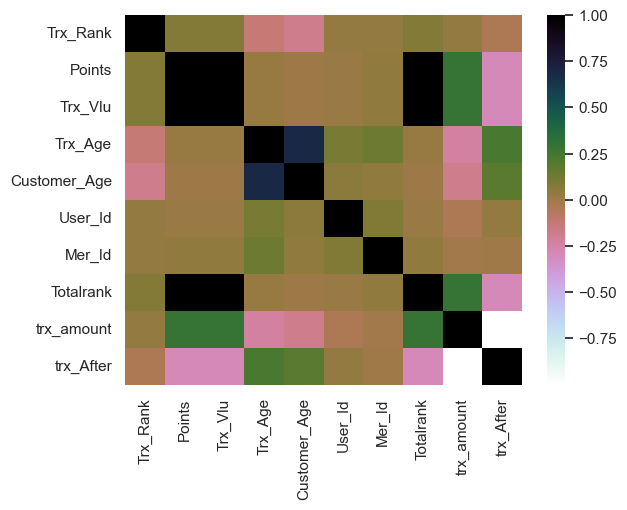

In [165]:
#plotting the correlation matrix
sns.heatmap(df.corr() ,cmap='cubehelix_r')

In [166]:
#correlation table
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<Axes: xlabel='Trx_Vlu', ylabel='Totalrank'>

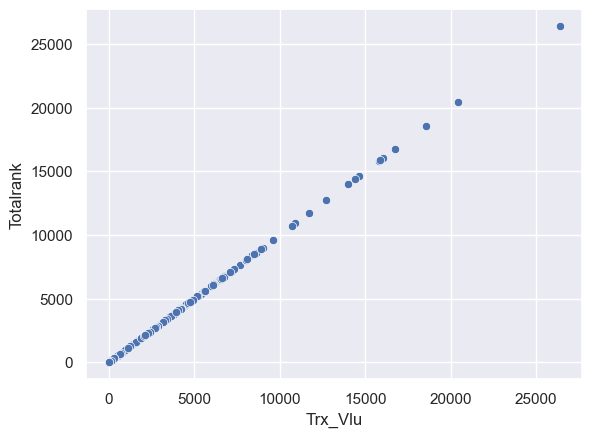

In [167]:
#have to work on outlies
applicant_income=df['Trx_Vlu']
co_applicant_income=df['Totalrank']
sns.scatterplot(x=applicant_income,y=co_applicant_income)

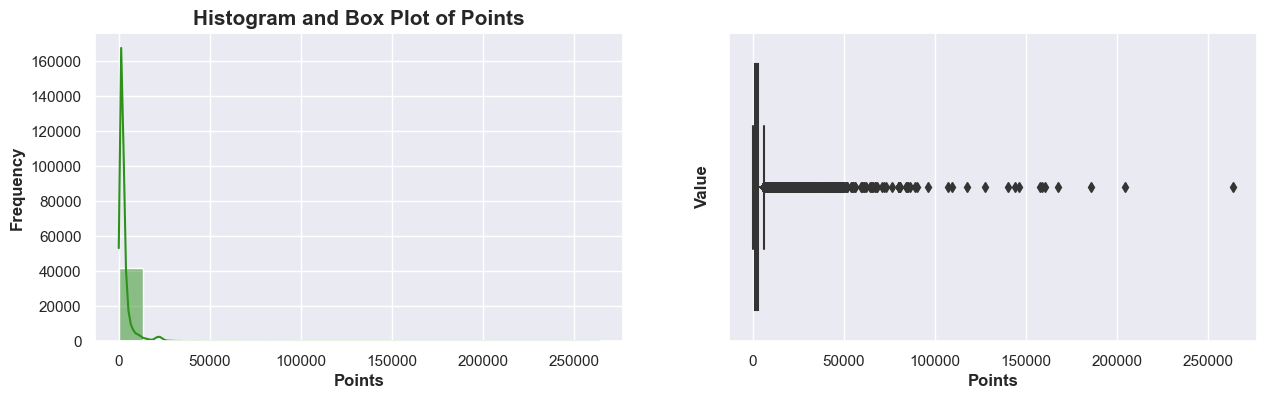

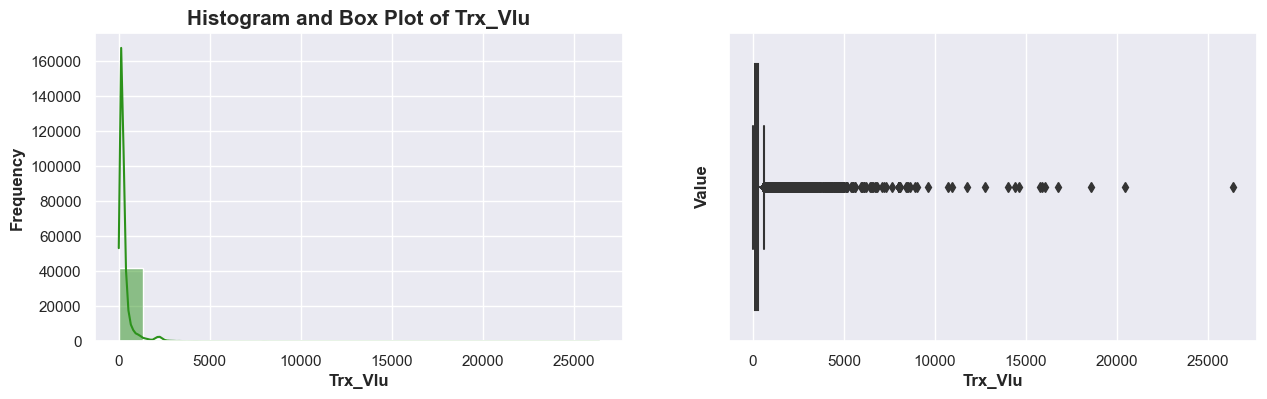

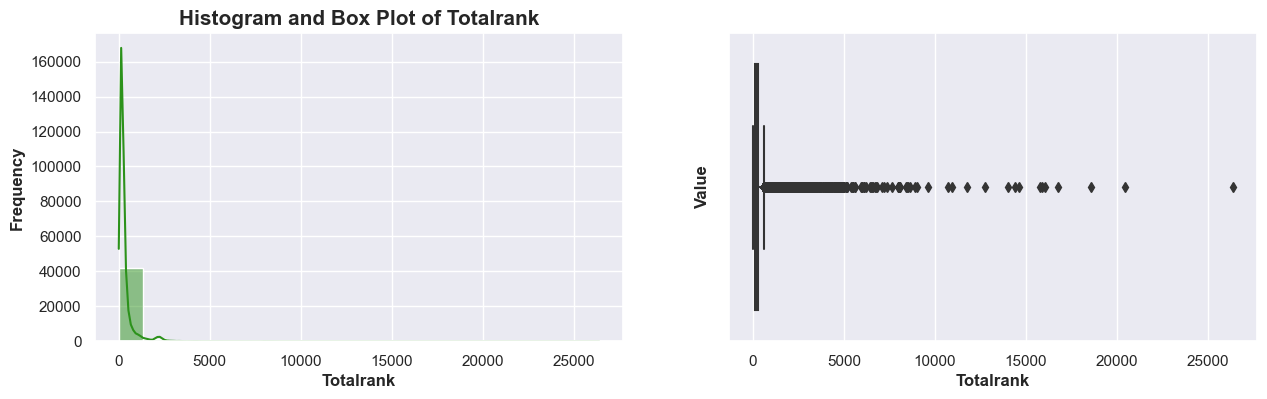

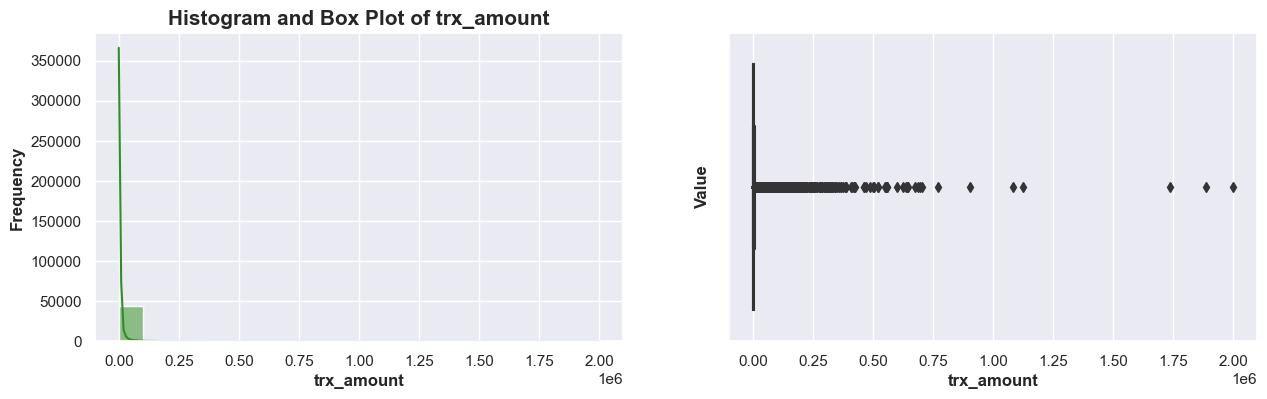

In [168]:
#Creating a list including the columns have outliers
col_outliers = ["Points","Trx_Vlu","Totalrank","trx_amount"]

#Creating a function of visualizing outliers using box and distribution plots
def plot_hist_box(df, column):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))
    sns.histplot(data=df, x=column, bins=20, kde=True, ax=ax1, color='#2c921b')
    sns.boxplot(data=df, x=column, ax=ax2, color='#921b8b')
    ax1.set_title(f"Histogram and Box Plot of {column}", size=15, weight='bold')
    ax1.set_xlabel(column, size=12, weight='bold')
    ax1.set_ylabel("Frequency", size=12, weight='bold')
    ax2.set_xlabel(column, size=12, weight='bold')
    ax2.set_ylabel("Value", size=12, weight='bold')
    plt.show()

#Showing all the columns in one action 
for col in col_outliers:
    plot_hist_box(df, col)

In [169]:
def remove_outliers(df, columns, k=1.5):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return data

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trx_Rank             43672 non-null  int64  
 1   Points               43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Customer_Age         43672 non-null  int64  
 5   Category In English  43672 non-null  object 
 6   User_Id              43672 non-null  int64  
 7   Mer_Id               43672 non-null  int64  
 8   Totalrank            43672 non-null  float64
 9   trx_amount           43672 non-null  float64
 10  trx_After            43672 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 3.7+ MB


In [171]:
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df.select_dtypes('object').columns.to_list()

#numeric df
TR_num =  df[num]
#categoric df
TR_cat = df[cat]

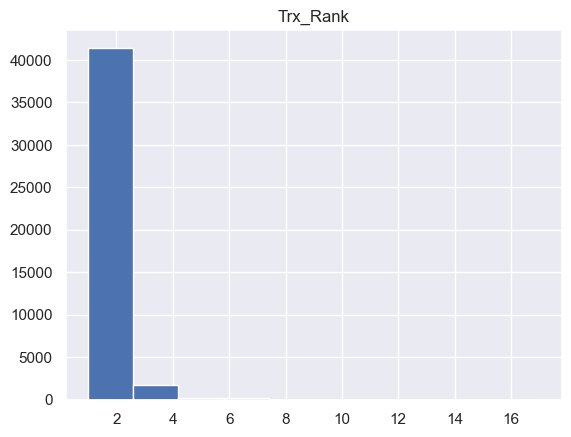

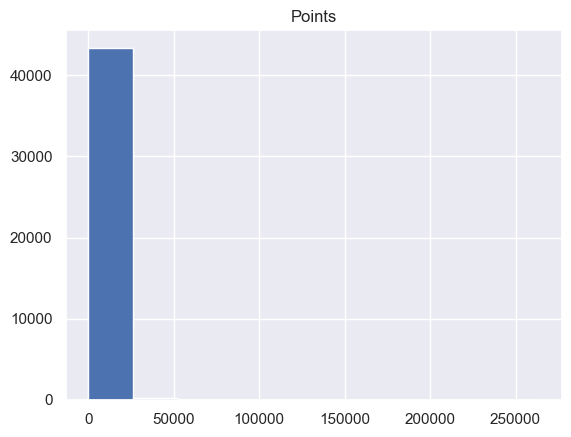

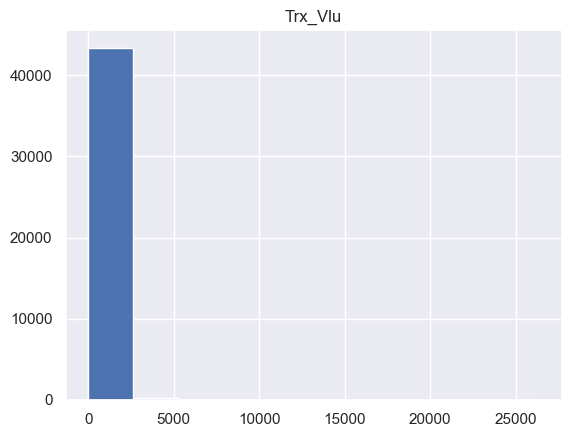

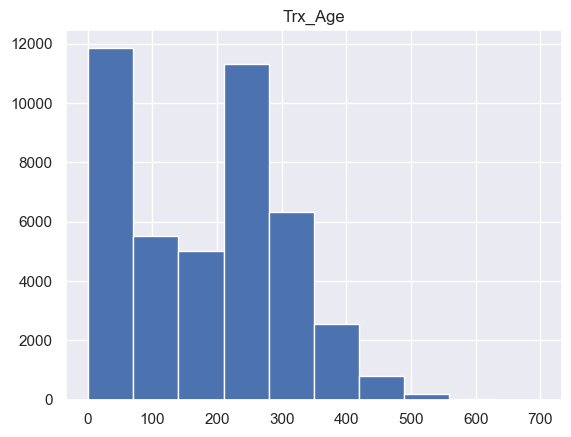

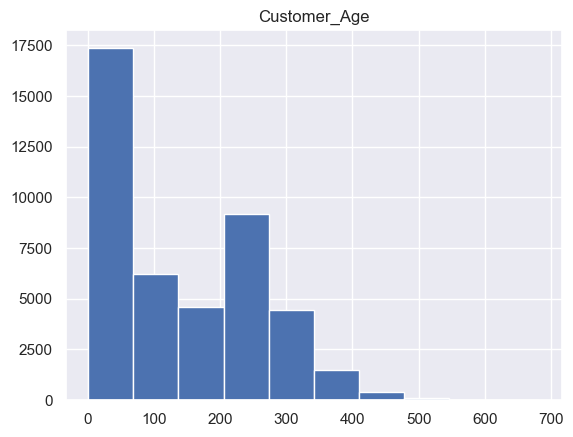

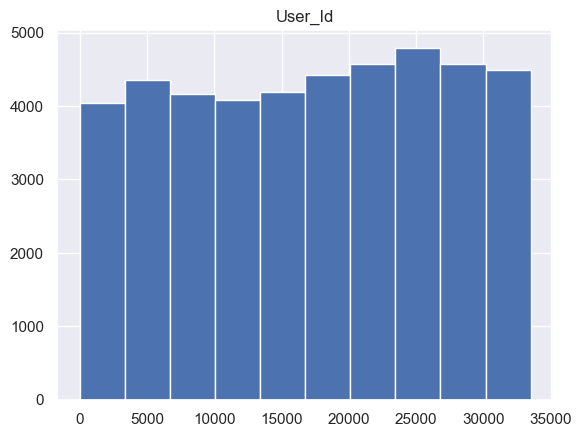

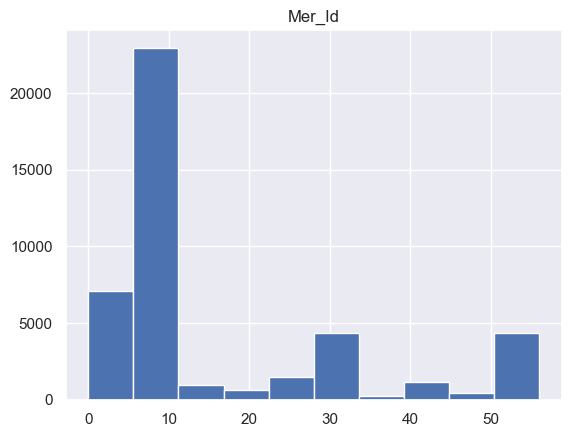

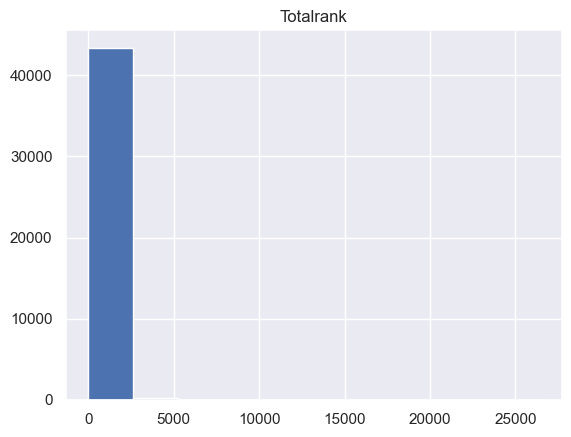

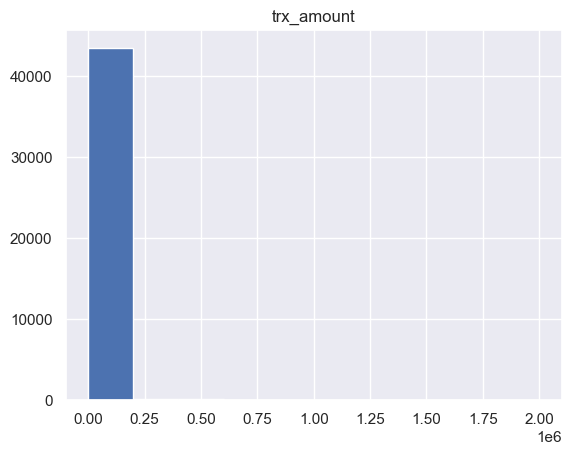

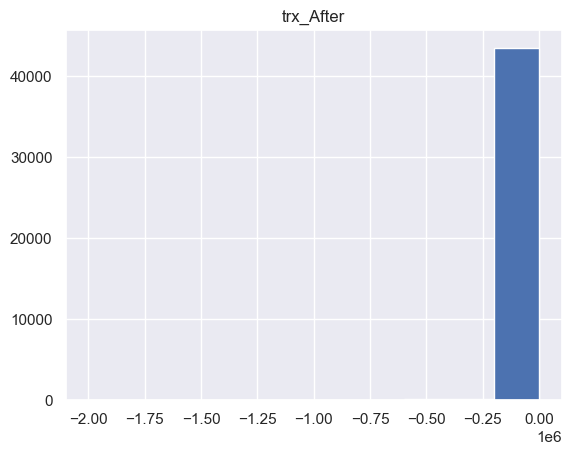

In [172]:
for i in TR_num:
    plt.hist(TR_num[i])
    plt.title(i)
    plt.show()

In [173]:
for i in cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Category In English', data=df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

<Axes: >

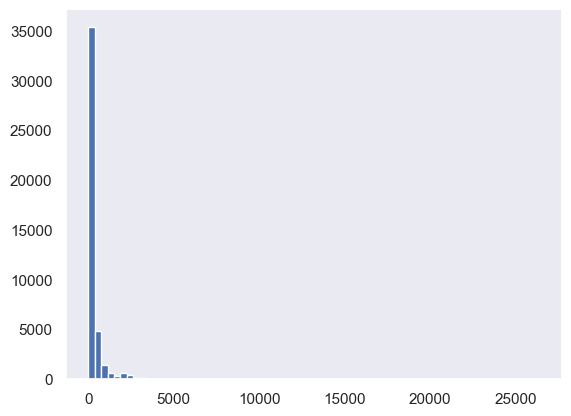

In [174]:
df['Trx_Vlu'].hist(bins=70,grid=False)

<Axes: >

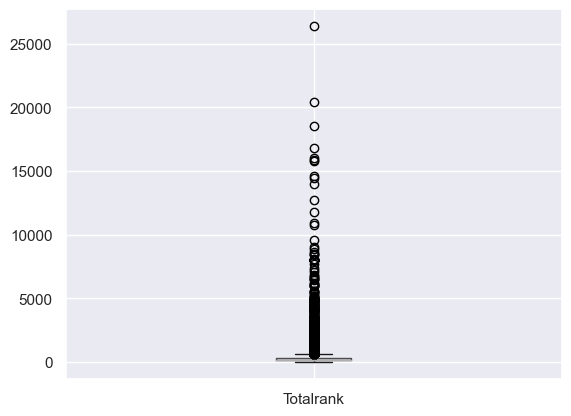

In [175]:
df.boxplot(column = 'Totalrank')

In [176]:
df

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
0             1   20140   2014.0      362           362             Fashion   
1             1   11200   1120.0      371           368             Fashion   
2             2    8500    850.0      368           368             Fashion   
3             1    1980    198.0      558            34             Fashion   
4             1    2400    240.0      413           413             Fashion   
...         ...     ...      ...      ...           ...                 ...   
43667         1    3050    305.0       27            27                 F&B   
43668         1    3120    312.0       31            31                 F&B   
43669         1    1200    120.0       25            25                 F&B   
43670         1      20      2.0        2             2               Other   
43671         2      20      2.0        2             2               Other   

       User_Id  Mer_Id  Totalrank  trx_amount  trx_After  
0        21053       0     2015.0     5563.54   -5562.54  
1        26472       0     1121.0     3018.87   -3017.87  
2        26472       0      852.0     2309.78   -2307.78  
3        27075       0      199.0      354.84    -353.84  
4        27417       0      241.0      581.11    -580.11  
...        ...     ...        ...         ...        ...  
43667    26865      55      306.0    11296.30  -11295.30  
43668    27128      55      313.0    10064.52  -10063.52  
43669    28814      55      121.0     4800.00   -4799.00  
43670    29107      56        3.0     1000.00    -999.00  
43671    29107      56        4.0     1000.00    -998.00  

[43672 rows x 11 columns]

In [177]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder , RobustScaler
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [178]:
X = df
y = df['Category In English']

In [179]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Category In English'] = le.fit_transform(X['Category In English'])

y = le.transform(y)

In [181]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trx_Rank             43672 non-null  int64  
 1   Points               43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Customer_Age         43672 non-null  int64  
 5   Category In English  43672 non-null  int32  
 6   User_Id              43672 non-null  int64  
 7   Mer_Id               43672 non-null  int64  
 8   Totalrank            43672 non-null  float64
 9   trx_amount           43672 non-null  float64
 10  trx_After            43672 non-null  float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 3.5 MB


In [182]:
X.head()

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age  Category In English  \
0         1   20140   2014.0      362           362                    2   
1         1   11200   1120.0      371           368                    2   
2         2    8500    850.0      368           368                    2   
3         1    1980    198.0      558            34                    2   
4         1    2400    240.0      413           413                    2   

   User_Id  Mer_Id  Totalrank  trx_amount  trx_After  
0    21053       0     2015.0     5563.54   -5562.54  
1    26472       0     1121.0     3018.87   -3017.87  
2    26472       0      852.0     2309.78   -2307.78  
3    27075       0      199.0      354.84    -353.84  
4    27417       0      241.0      581.11    -580.11

##  Feature Scaling

In [183]:
cols = X.columns

In [184]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [185]:
X = pd.DataFrame(X, columns=[cols])

In [186]:
X.head()

Trx_Rank    Points   Trx_Vlu   Trx_Age Customer_Age Category In English  \
0   0.0000  0.076276  0.076276  0.517934     0.530103            0.333333   
1   0.0000  0.042384  0.042384  0.530846     0.538913            0.333333   
2   0.0625  0.032148  0.032148  0.526542     0.538913            0.333333   
3   0.0000  0.007430  0.007430  0.799139     0.048458            0.333333   
4   0.0000  0.009023  0.009023  0.591105     0.604993            0.333333   

    User_Id Mer_Id Totalrank trx_amount trx_After  
0  0.628110    0.0  0.076255   0.002780  0.997220  
1  0.789785    0.0  0.042373   0.001507  0.998492  
2  0.789785    0.0  0.032177   0.001153  0.998847  
3  0.807775    0.0  0.007428   0.000175  0.999824  
4  0.817978    0.0  0.009020   0.000288  0.999711

## K-Means model with two clusters

In [187]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

## K-Means model parameters study

In [188]:
kmeans.cluster_centers_

array([[0.01636863, 0.0118868 , 0.0118868 , 0.24699986, 0.2012594 ,
        0.45658469, 0.49544382, 0.13354493, 0.01189357, 0.00315679,
        0.99684288],
       [0.0171472 , 0.01411043, 0.01411043, 0.31157228, 0.2340641 ,
        0.37026247, 0.55875733, 0.72146774, 0.01411708, 0.00278479,
        0.99721489]])

In [189]:
kmeans.inertia_

7800.991852574545

## Check quality of weak classification by the model

In [190]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 2956 out of 43672 samples were correctly labeled.


In [191]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.07


## Use elbow method to find optimal number of clusters

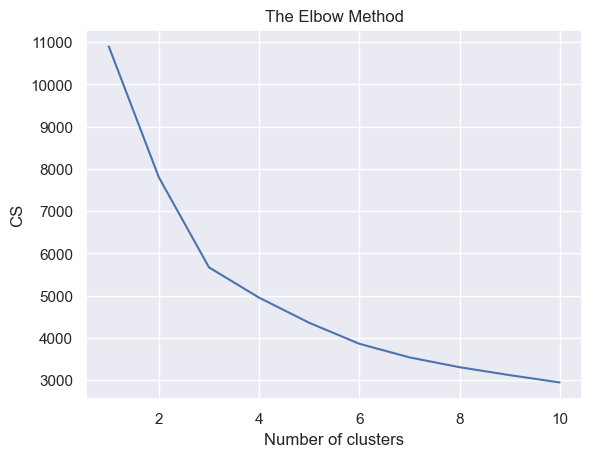

In [192]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [193]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 2956 out of 43672 samples were correctly labeled.
Accuracy score: 0.07


## K-Means model with different clusters

In [194]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 3622 out of 43672 samples were correctly labeled.
Accuracy score: 0.08


In [195]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 12422 out of 43672 samples were correctly labeled.
Accuracy score: 0.28
